<a href="https://colab.research.google.com/github/princil1a/Princilia/blob/main/CDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Data Loading and Inspection:

The code loads multiple datasets and inspects the first few rows to understand their structure.


In [11]:
# Load datasets
df_features = pd.read_csv("/content/features.csv")
df_store = pd.read_csv("/content/stores.csv")
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [12]:
# Inspect datasets
print(df_features.head())
print(df_store.head())
print(df_train.head())
print(df_test.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   348

Data Preprocessing:

1)Column names are standardized for consistency.
2)Datasets are merged to create a comprehensive DataFrame containing sales, features, and store information.

In [13]:
# Preprocess datasets
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')
df_store.columns = df_store.columns.str.lower().str.replace(' ', '_')
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

In [14]:
# Merge datasets
train_data = pd.merge(df_train, df_features, on=['store', 'date'], how='left')
train_data = pd.merge(train_data, df_store, on=['store'], how='left')

Date Handling:

The 'date' column is converted to a datetime format, and new features (year, month, day) are extracted from it.


In [15]:
# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

In [16]:
# Aggregate sales data by date
daily_sales = train_data.groupby('date')['weekly_sales'].sum().reset_index()
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['day'] = daily_sales['date'].dt.day

Feature and Target Definition:

Features (year, month, day) are defined for the regression model, and the target variable is weekly sales.


In [17]:
# Features and target variable
X = daily_sales[['year', 'month', 'day']]
y = daily_sales['weekly_sales']

Train-Test Split:

The data is split into training and testing sets to evaluate model performance.


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training:

A Linear Regression model is fitted to the training data.


In [19]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions and Evaluation:

Predictions are made on the test set, and performance metrics (Mean Squared Error and R² score) are calculated.


In [21]:
# Predictions
y_pred = model.predict(X_test)


In [22]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R^2 Score: {r2}')

Mean Squared Error: 24310491561520.14, R^2 Score: 0.2011486524244679


Visualization:

A plot is created to compare actual sales (test data) against predicted sales.


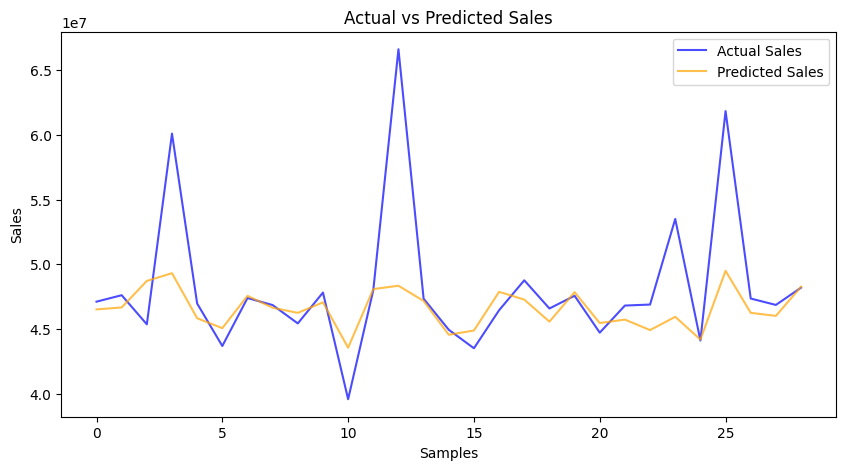

In [23]:
# Visualization of actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Sales', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()

Handling Missing Values:

Missing values in features are filled, and the code visualizes sales data by store.


In [25]:
# Check for missing values in features
df_features['cpi'] = df_features['cpi'].fillna(df_features['cpi'].median())
df_features['unemployment'] = df_features['unemployment'].fillna(df_features['unemployment'].median())
for i in range(1, 6):
    df_features[f'markdown{i}'] = df_features[f'markdown{i}'].fillna(0)


Visualizing sales by store is a crucial step in understanding how different locations contribute to overall sales performance

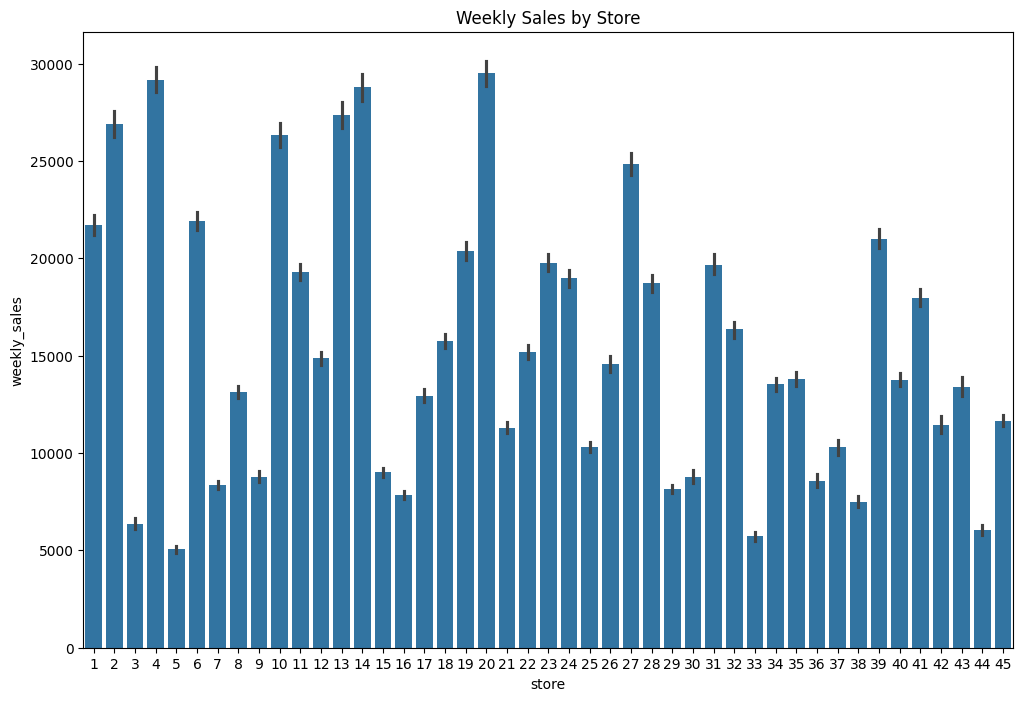

In [26]:
# Visualize sales by store
plt.figure(figsize=(12, 8))
sns.barplot(x='store', y='weekly_sales', data=train_data)
plt.title('Weekly Sales by Store')
plt.show()

In [27]:
# Save final merged dataset
final_merged_df = pd.merge(train_data, df_store, on='store', how='inner')
final_merged_df.to_csv('final_merged_df.csv', index=False)

In [28]:
# Read the saved dataset
data = pd.read_csv('final_merged_df.csv')
data['date'] = pd.to_datetime(data['date'])

Further Feature Engineering:

After merging and saving the final dataset, additional features (week, etc.) are engineered.


In [29]:
# Further feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week

Final Model Training:
The model is retrained using the complete dataset after addressing categorical variables through one-hot encoding and ensuring there are no missing values.


In [30]:
# Model training on the complete dataset
features = data.drop(columns=['weekly_sales', 'date'])
target = data['weekly_sales']

In [ ]:
# Check for missing values in the features
missing_values = features.isnull().sum()
print(missing_values[missing_values > 0])

In [31]:
# Check the data types of the features
print(features.dtypes)

store             int64
dept              int64
isholiday_x        bool
temperature     float64
fuel_price      float64
markdown1       float64
markdown2       float64
markdown3       float64
markdown4       float64
markdown5       float64
cpi             float64
unemployment    float64
isholiday_y        bool
type_x           object
size_x            int64
type_y           object
size_y            int64
year              int32
month             int32
week             UInt32
dtype: object


In [32]:
# Identify non-numeric columns
non_numeric_cols = features.select_dtypes(include=['object']).columns
print(f'Non-numeric columns: {non_numeric_cols}')

Non-numeric columns: Index(['type_x', 'type_y'], dtype='object')


In [33]:
#Convert categorical columns to numeric using one-hot encoding
features = pd.get_dummies(features, columns=non_numeric_cols, drop_first=True)

In [34]:
# After handling non-numeric values, check for NaN values
print(features.isnull().sum().sum())

1422431


In [35]:
# filling NaN values in numeric columns
features.fillna(features.median(), inplace=True)

In [36]:
# Proceed to split and fit the model again
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
# Final evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Final Mean Squared Error: {mse}, Final R^2 Score: {r2}')

Final Mean Squared Error: 473190451.5844795, Final R^2 Score: 0.0925852865311676
